   Day    Price     Open     High      Low   Volume    Chg%
0  Tue  2081.85  2092.00  2126.90  2065.05    1.67M  0.0020
1  Mon  2077.75  2084.00  2112.45  2068.40  707.73K  0.0043
2  Fri  2068.85  2084.35  2088.50  2053.10  475.82K -0.0020
3  Thu  2072.95  2098.00  2098.00  2066.00  541.51K -0.0026
4  Wed  2078.25  2102.00  2111.40  2072.00  809.62K -0.0023
Test Accuracy: 0.9333333333333333
Predictions: [1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 2 1 2 1 2 1 1 1 0 1 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2
 1]


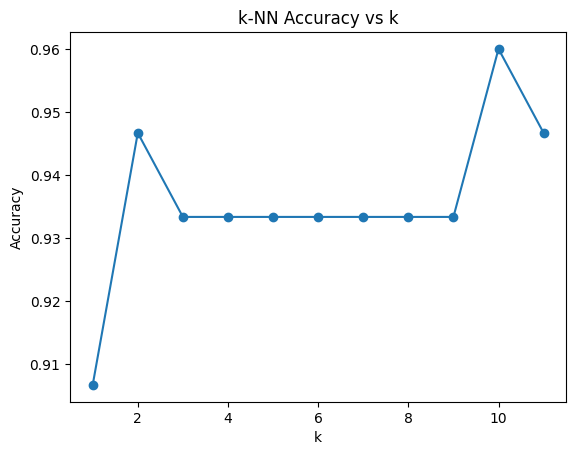

Confusion Matrix - Training Data:
[[ 13   0   0]
 [  0 143   0]
 [  1   0  17]]

Confusion Matrix - Test Data:
[[ 5  0  2]
 [ 0 59  1]
 [ 0  2  6]]

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00       143
           2       1.00      0.94      0.97        18

    accuracy                           0.99       174
   macro avg       0.98      0.98      0.98       174
weighted avg       0.99      0.99      0.99       174


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.97      0.98      0.98        60
           2       0.67      0.75      0.71         8

    accuracy                           0.93        75
   macro avg       0.88      0.82      0.84        75
weighted avg       0.94      0.93      0.93        75



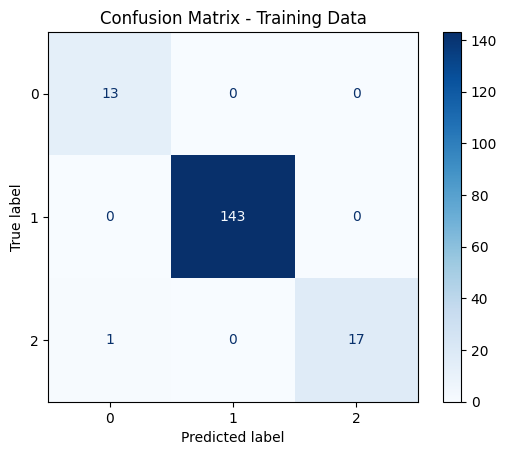

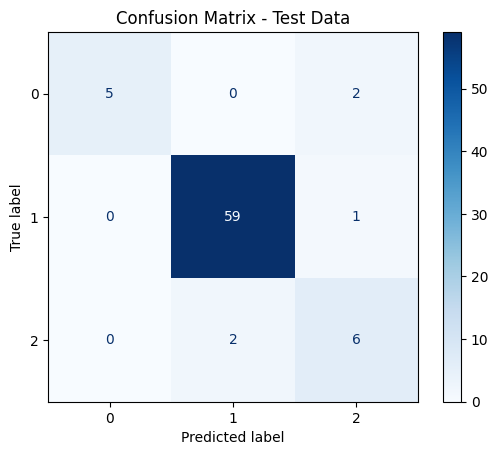

In [ ]:
#1
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('Lab Session Data.xlsx', sheet_name="IRCTC Stock Price")
df=df.drop(columns=df.columns[:2])
print(df.head())
#day encoding
day_encoder = LabelEncoder()

df['Day_Encoded']= day_encoder.fit_transform(df['Day'])

#data extraction
X = df.iloc[:250, [2,3]].values
y = df.iloc[:250, 1].values
y=pd.to_numeric(y, errors='coerce')

#imputation
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.reshape(-1, 1)).ravel()

price_bins = [0, 1800, 2000, float('inf')]
price_labels = ['Low', 'Medium', 'High']
y = pd.cut(y, bins=price_bins, labels=price_labels)

y=LabelEncoder().fit_transform(y)


#splitting data
def split_data(X, y, test_size=0.3):
    return train_test_split(X, y, test_size=test_size, random_state=42)


X_train, X_test, y_train, y_test = split_data(X, y)

#training classifier
def train_knn(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

knn_model = train_knn(X_train, y_train)

#testing
def test_knn(knn, X_test, y_test):
    return knn.score(X_test, y_test)

accuracy = test_knn(knn_model, X_test, y_test)
print("Test Accuracy:", accuracy)

#prediction
def predict_knn(knn, X_new):
    return knn.predict(X_new)


if X_test.shape[0] > 0:
    predictions = predict_knn(knn_model, X_test)
    print("Predictions:", predictions)

#classifier evaluation
def evaluate_knn_different_k(X_train, X_test, y_train, y_test):
    k_values = list(range(1, min(12, len(X_train)+1)))
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracies.append(knn.score(X_test, y_test))

    plt.plot(k_values, accuracies, marker='o')
    plt.title("k-NN Accuracy vs k")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.show()

    return k_values, accuracies

evaluate_knn_different_k(X_train, X_test, y_train, y_test)

def evaluate_model(knn, X_train, y_train, X_test, y_test):
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    print("Confusion Matrix - Training Data:")
    print(confusion_matrix(y_train, y_train_pred))

    print("\nConfusion Matrix - Test Data:")
    print(confusion_matrix(y_test, y_test_pred))

    print("\nClassification Report - Training Data:")
    print(classification_report(y_train, y_train_pred))

    print("\nClassification Report - Test Data:")
    print(classification_report(y_test, y_test_pred))

evaluate_model(knn_model, X_train, y_train, X_test, y_test)
#confusion matrix plotting
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

plot_confusion_matrix(y_train, y_train_pred, title="Confusion Matrix - Training Data")

plot_confusion_matrix(y_test, y_test_pred, title="Confusion Matrix - Test Data")

MSE: 1809.11
RMSE: 42.53
MAPE: 1.70%
R² Score: 0.9671


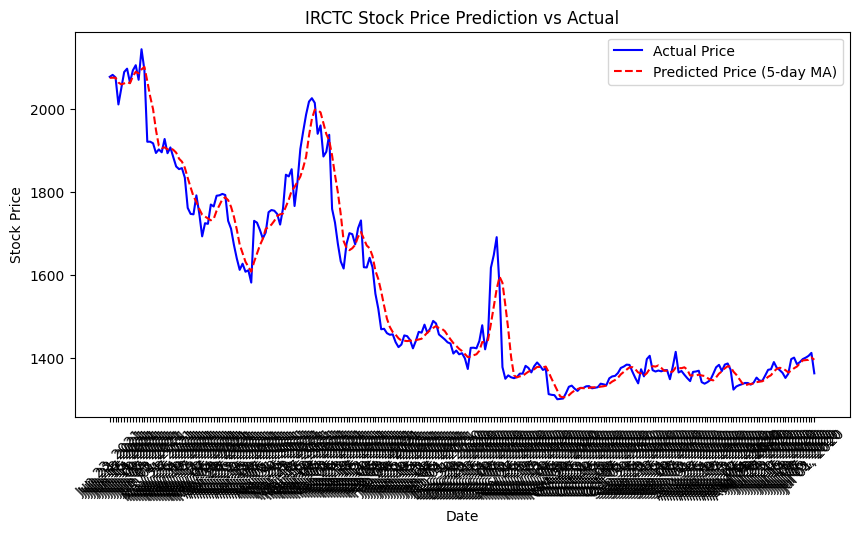

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


file_path = "Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)

# Load the "IRCTC Stock Price" sheet
df_irctc = pd.read_excel(xls, sheet_name="IRCTC Stock Price")

# Convert Price column to numeric
df_irctc["Price"] = pd.to_numeric(df_irctc["Price"], errors="coerce")

# Generate predictions using a 5-day moving average
df_irctc["Predicted_Price"] = df_irctc["Price"].rolling(window=5).mean()

# Drop rows with NaN values (since the first few rows won't have a moving average)
df_irctc = df_irctc.dropna()

# Extract actual and predicted prices
actual_prices = df_irctc["Price"].values
predicted_prices = df_irctc["Predicted_Price"].values

# Calculate error metrics
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
r2 = r2_score(actual_prices, predicted_prices)

# Print results
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(df_irctc["Date"], actual_prices, label="Actual Price", color="blue")
plt.plot(df_irctc["Date"], predicted_prices, label="Predicted Price (5-day MA)", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("IRCTC Stock Price Prediction vs Actual")
plt.legend()
plt.xticks(rotation=45)
plt.show()


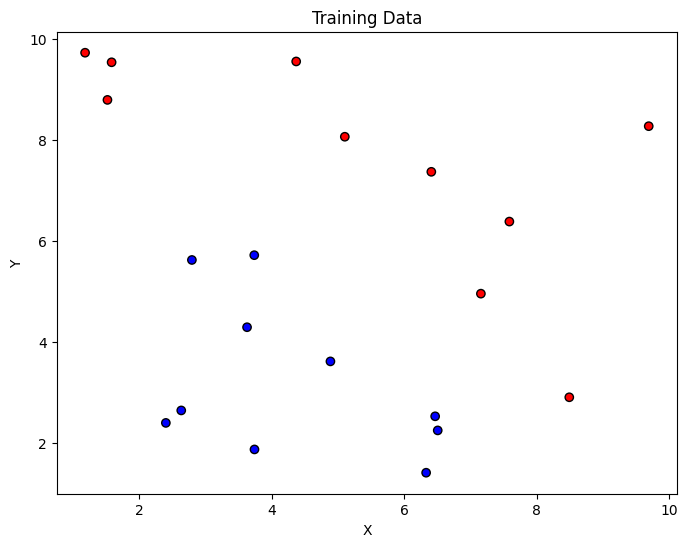

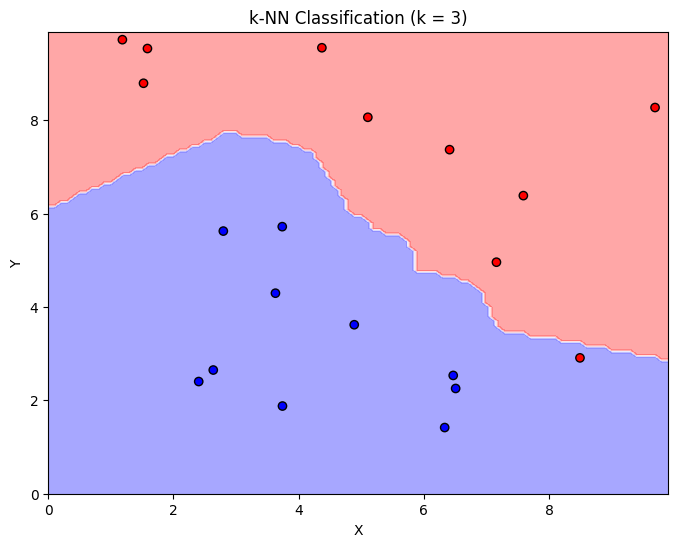

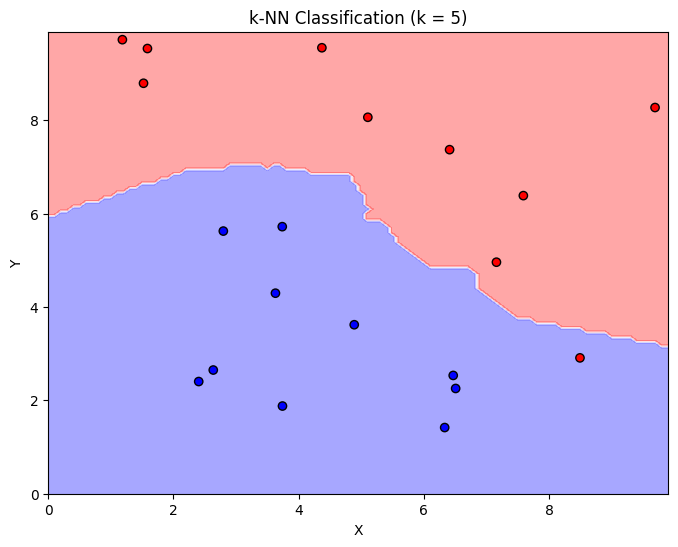

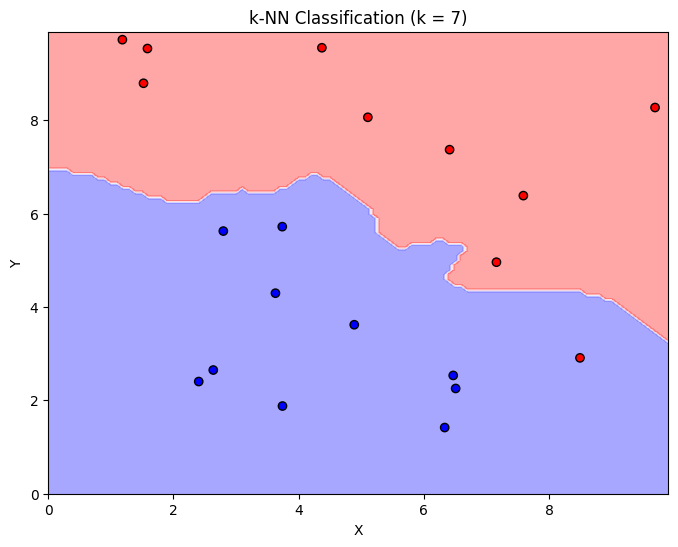

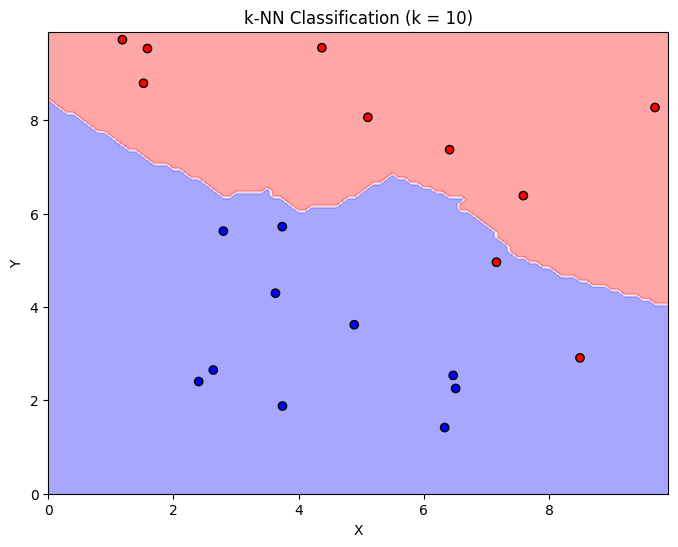

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.95  nan 0.8  0.95 0.9   nan  nan  nan 0.5   nan]
  warnings.warn(


Best k: 5
Best score: 0.95
The best K value is 5


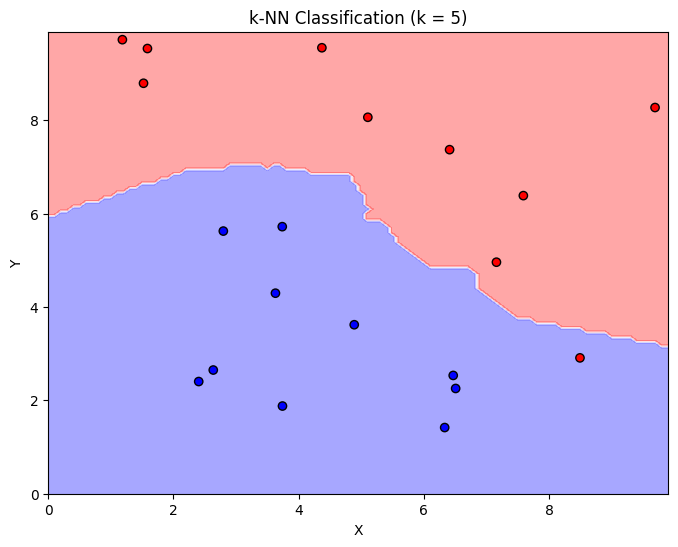

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

#3
np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))  # 20 points with 2 features (X, Y)
y_train = np.array([0 if x[0] + x[1] < 10 else 1 for x in X_train])  # Assigning classes based on sum

# Scatter plot of training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#4 & 5
def classify_test_data(X_train, y_train, k_values):
    x_min, x_max = 0, 10
    y_min, y_max = 0, 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_test = np.c_[xx.ravel(), yy.ravel()]

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        Z = knn.predict(X_test)
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
        plt.title(f'k-NN Classification (k = {k})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

#7
def tune_k(X_train, y_train):
    param_dist = {'n_neighbors': list(range(1, 31))}
    knn = KNeighborsClassifier()
    random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)
    random_search.fit(X_train, y_train)

    print("Best k:", random_search.best_params_['n_neighbors'])
    print("Best score:", random_search.best_score_)
    return random_search.best_params_['n_neighbors']

# Experiment with different k values
k_values = [3, 5, 7, 10]
classify_test_data(X_train, y_train, k_values)

# Hyperparameter tuning for best k
best_k = tune_k(X_train, y_train)
print(f"The best K value is {best_k}")

# Rerun A4 and A5 with best_k
classify_test_data(X_train, y_train, [best_k])
